In [0]:
from PIL import Image
import pandas as pd
import glob
import re
import numpy as np
import imutils
import time
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from keras.preprocessing import image
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

In [7]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [0]:
dir_train = '/content/drive/My Drive/Estadistica Multivariada/Proyecto Final/Dataset/datalake/Train/'
datagen_train = ImageDataGenerator(rescale=1./255)

dir_val = '/content/drive/My Drive/Estadistica Multivariada/Proyecto Final/Dataset/datalake/Validation/'
datagen_val = ImageDataGenerator(rescale=1./255)

gen_train = datagen_train.flow_from_directory(
    dir_train, target_size=(150, 150), class_mode='sparse'
)
gen_val = datagen_val.flow_from_directory(
    dir_val, target_size=(150, 150), class_mode='sparse'
)

Found 30 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [0]:
modelo1 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(2, activation='softmax')
])

modelo1.summary()

modelo1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 34,561,538
Trainable params: 34,561,538
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Entrenamiento
historia1 = modelo1.fit_generator(gen_train, epochs=1, validation_data=gen_val,
                                  steps_per_epoch=80, verbose=1)
# Guardo el modelo
modelo1.save("modelo1.h5")

80/80 [==============================] - 66s 831ms/step - loss: 7.1902 - acc: 0.4908 - val_loss: 0.6879 - val_acc: 0.8750


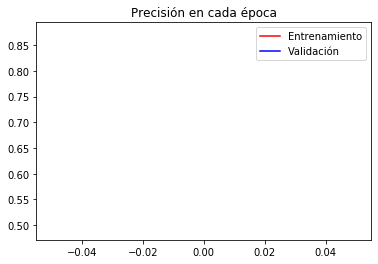

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epocas = range(len(acc))

  plt.plot(epocas, acc, 'r', label='Entrenamiento')
  plt.plot(epocas, val_acc, 'b', label='Validación')
  plt.title('Precisión en cada época')
  plt.legend(loc=0)
  
plot_history(historia1)

**Data Augmentation** *texto en cursiva*

In [0]:
# Repo de Imagenes
path= '/content/drive/My Drive/Machine Learning/DataAUG/DataAUG'

In [3]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
imagenes=[]
m=0
for filename in glob.glob(path+'/*'): 
  m=m+1
  filename[57:58]
  # load the image
  img = load_img(filename)
  # convert to numpy array
  data = img_to_array(img)
  # expand dimension to one sample
  samples = expand_dims(data, 0)
  # create image data augmentation generator
  datagen = ImageDataGenerator(width_shift_range=[-200,200])
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  k=0
  for i in range(9):
    
    # define subplot
    # pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    k=k+1
    pyplot.imshow(image)
    # pyplot.savefig('/content/drive/My Drive/Machine Learning/Data/Todo/'+str(filename[57:58])+'_'+str(m)+'_'+str(k)+'.jpg')
    pyplot.show()
  datagen = ImageDataGenerator(height_shift_range=0.5)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
    # define subplot
    # pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    k=k+1
    pyplot.imshow(image)
    # pyplot.savefig('/content/drive/My Drive/Machine Learning/Data/Todo/'+str(filename[57:58])+'_'+str(m)+'_'+str(k)+'.jpg')
    pyplot.show()
  # show the figure
  datagen = ImageDataGenerator(horizontal_flip=True)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
    # define subplot
    # pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    k=k+1
    # plot raw pixel data
    pyplot.imshow(image)
    # pyplot.savefig('/content/drive/My Drive/Machine Learning/Data/Todo/'+str(filename[57:58])+'_'+str(m)+'_'+str(k)+'.jpg')
    pyplot.show()
  datagen = ImageDataGenerator(rotation_range=90)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
    # define subplot
    # pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    k=k+1
    # plot raw pixel data
    pyplot.imshow(image)
    # pyplot.savefig('/content/drive/My Drive/Machine Learning/Data/Todo/'+str(filename[57:58])+'_'+str(m)+'_'+str(k)+'.jpg')
    pyplot.show()

  datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
    # define subplot
    # pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    k=k+1
    # plot raw pixel data
    pyplot.imshow(image)
    # pyplot.savefig('/content/drive/My Drive/Machine Learning/Data/Todo/'+str(filename[57:58])+'_'+str(m)+'_'+str(k)+'.jpg')
    pyplot.show()

  datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  # generate samples and plot
  for i in range(9):
    # define subplot
    # pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    k=k+1
    # plot raw pixel data
    pyplot.imshow(image)
    # pyplot.savefig('/content/drive/My Drive/Machine Learning/Data/Todo/'+str(filename[57:58])+'_'+str(m)+'_'+str(k)+'.jpg')
    pyplot.show()

In [30]:
dir_train = '/content/drive/My Drive/Machine Learning/Data/Train/'
datagen_train = ImageDataGenerator(rescale=1./255)

dir_val = '/content/drive/My Drive/Machine Learning/Data/Validation/'
datagen_val = ImageDataGenerator(rescale=1./255)

gen_train = datagen_train.flow_from_directory(
    dir_train, target_size=(150, 150), class_mode='sparse'
)
gen_val = datagen_val.flow_from_directory(
    dir_val, target_size=(150, 150), class_mode='sparse'
)

Found 1522 images belonging to 2 classes.
Found 327 images belonging to 2 classes.


In [31]:
modelo1 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(2, activation='softmax')
])

modelo1.summary()

modelo1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 34,561,538
Trainable params: 34,561,538
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Entrenamiento
historia1 = modelo1.fit_generator(gen_train, epochs=100, validation_data=gen_val,
                                  steps_per_epoch=20, verbose=1)
# Guardo el modelo
modelo1.save("modelo1.h5")

Epoch 1/100
20/20 [==============================] - 8s 424ms/step - loss: 0.1540 - acc: 0.9375 - val_loss: 0.1964 - val_acc: 0.9511
Epoch 2/100
20/20 [==============================] - 7s 369ms/step - loss: 0.6074 - acc: 0.8211 - val_loss: 0.5481 - val_acc: 0.8869
Epoch 3/100
20/20 [==============================] - 8s 387ms/step - loss: 1.1110 - acc: 0.7328 - val_loss: 0.5756 - val_acc: 0.7859
Epoch 4/100
20/20 [==============================] - 8s 386ms/step - loss: 0.5426 - acc: 0.8307 - val_loss: 0.4530 - val_acc: 0.7768
Epoch 5/100
20/20 [==============================] - 7s 374ms/step - loss: 0.1692 - acc: 0.9375 - val_loss: 0.1925 - val_acc: 0.9358
Epoch 6/100
20/20 [==============================] - 8s 385ms/step - loss: 0.1802 - acc: 0.9441 - val_loss: 0.1475 - val_acc: 0.9602
Epoch 7/100
20/20 [==============================] - 7s 356ms/step - loss: 0.1657 - acc: 0.9391 - val_loss: 0.8599 - val_acc: 0.6881
Epoch 8/100
20/20 [==============================] - 8s 401ms/step - 

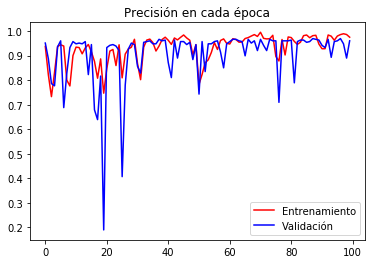

In [38]:
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epocas = range(len(acc))

  plt.plot(epocas, acc, 'r', label='Entrenamiento')
  plt.plot(epocas, val_acc, 'b', label='Validación')
  plt.title('Precisión en cada época')
  plt.legend(loc=0)
  
plot_history(historia1)